# Python Prerequisites

In this below cell we install sondehub library

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install sondehub

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


# Imports
Next we import the python libraries we'll be using.

In [13]:
# Sondehub lib that we'll be using to download and access the data
import sondehub

#numpy, matplotlib and scipy to help us graph and process some of the data
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import datetime

# Download data
The sondehub library handles accessing the data. Behind the scenes it's downloading the data from AWS Open Data S3 bucket.

For this example we'll be looking at the "S1120364" radiosonde. You can find other serial numbers by browsing the S3 bucket for the open data at https://sondehub-open-data.s3-website-us-east-1.amazonaws.com or you can look at which radiosondes are currently aloft at https://sondehub.org

In [6]:
# This will take a little bit of time depending on your internet connection
radiosonde = sondehub.download(serial="S4620525")

In [7]:
radiosonde[0] # let's have a look at the first record

{'datetime': '2021-02-09T22:30:39.001000Z',
 'uploader_position': '-34.8137,138.7488',
 'software_name': 'radiosonde_auto_rx',
 'uploader_callsign': 'AREG_AUTO_RX',
 'alt': -4.25039,
 'lon': 138.52045,
 'vel_h': 0.13142,
 'frequency': 401.501,
 'vel_v': 0.18256,
 'manufacturer': 'Vaisala',
 'batt': 3,
 'software_version': '1.4.1-beta8',
 'uploader_antenna': '6dBi Vertical',
 'lat': -34.95243,
 'subtype': 'RS41-SG',
 'snr': 10.1,
 'type': 'RS41',
 'sats': 7,
 'heading': 331.42193,
 'frame': 1268,
 'burst_timer': 65535,
 'time_received': '2021-02-09T22:30:23.122067Z',
 'serial': 'S4620525',
 'user-agent': 'autorx-1.4.1-beta8',
 'position': '-34.95243,138.52045',
 'upload_time_delta': -1.425171,
 'uploader_alt': 420}

# Parse data
To make things easier we use numpy to make an array out of the data. This will help us when we go to graph the data.

In this case we are going to graph altitude, snr vs time

In [37]:
data = np.array(
    [
        [datetime.datetime.strptime(each['datetime'], "%Y-%m-%dT%H:%M:%S.%fZ"), each['alt'], each['snr'] if 'snr' in each else None]
        for each in radiosonde
    ]
)

In [46]:
data = data[np.argsort(data[:, 0])] # order the data by the datetime

data # have a look at the data

array([[datetime.datetime(2021, 2, 9, 22, 30, 16, 1000), -6.80747, 7.8],
       [datetime.datetime(2021, 2, 9, 22, 30, 18, 179618), '-4', None],
       [datetime.datetime(2021, 2, 9, 22, 30, 28, 1000), -7.21371, 10.3],
       ...,
       [datetime.datetime(2021, 2, 10, 4, 43, 0, 118196), '277', None],
       [datetime.datetime(2021, 2, 10, 4, 43, 30, 212890), '277', None],
       [datetime.datetime(2021, 2, 10, 4, 44, 0, 188437), '277', None]],
      dtype=object)

# Graph the data

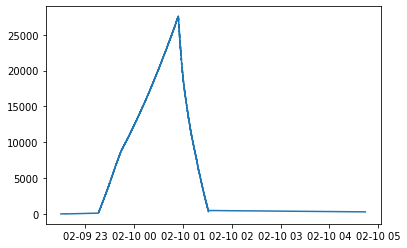

In [47]:
sonde_time = data[:,0] # get the datetime from the ndarray
alt = data[:,1] # get the altitude from the ndarray


plt.plot(sonde_time, alt)
plt.show()

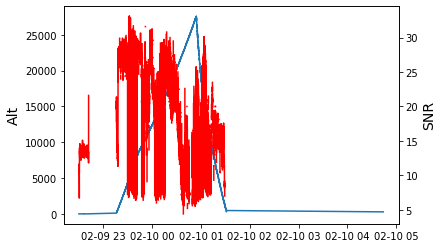

In [49]:
# Plot SNR along side

sonde_time = data[:,0] # get the datetime from the ndarray
alt = data[:,1] # get the altitude from the ndarray
snr = data[:,2] # get the altitude from the ndarray

fig,ax = plt.subplots()

ax.plot(sonde_time, alt) # plot altitude on the first axis
ax.set_ylabel("Alt",fontsize=14)

ax2=ax.twinx() # get a second axis
ax2.set_ylabel("SNR",fontsize=14)
ax2.plot(sonde_time, snr, color="red")


plt.show()